In [48]:
#IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
#READ DATASET
df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [3]:
df.shape

(349, 10)

In [4]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [6]:
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

In [7]:
df.Disease.unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [8]:
le = LabelEncoder()
def encode_columns(df, *args):
    for col in args:
        df[col] = le.fit_transform(df[col])
    return df

encode_columns(df,'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable')

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,Female,1,2,1
1,Common Cold,0,1,1,0,25,Female,2,2,0
2,Eczema,0,1,1,0,25,Female,2,2,0
3,Asthma,1,1,0,1,25,Male,2,2,1
4,Asthma,1,1,0,1,25,Male,2,2,1
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,1,0,1,0,80,Female,0,0,1
345,Stroke,1,0,1,0,85,Male,0,0,1
346,Stroke,1,0,1,0,85,Male,0,0,1
347,Stroke,1,0,1,0,90,Female,0,0,1


In [9]:
df.Disease.value_counts()

Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

In [10]:
df['Disease']. groupby(df['Gender']).value_counts()

Gender  Disease          
Female  Asthma               11
        Stroke                9
        Hypertension          6
        Migraine              6
        Osteoporosis          6
                             ..
Male    Schizophrenia         1
        Sepsis                1
        Sinusitis             1
        Sleep Apnea           1
        Tourette Syndrome     1
Name: Disease, Length: 153, dtype: int64

In [11]:
def min_max_scaler(columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

min_max_scaler(['Age'])

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,0.000000,Female,1,2,1
1,Common Cold,0,1,1,0,0.084507,Female,2,2,0
2,Eczema,0,1,1,0,0.084507,Female,2,2,0
3,Asthma,1,1,0,1,0.084507,Male,2,2,1
4,Asthma,1,1,0,1,0.084507,Male,2,2,1
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,1,0,1,0,0.859155,Female,0,0,1
345,Stroke,1,0,1,0,0.929577,Male,0,0,1
346,Stroke,1,0,1,0,0.929577,Male,0,0,1
347,Stroke,1,0,1,0,1.000000,Female,0,0,1


In [12]:
corr = df.corr()
corr

C:\Users\Admin\AppData\Local\Temp\ipykernel_34744\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level,Outcome Variable
Fever,1.000000,0.129183,-0.078882,0.262273,-0.011255,-0.208880,0.087727,0.180721
Cough,0.129183,1.000000,-0.171669,0.223115,-0.104511,0.079136,0.061270,-0.011530
Fatigue,-0.078882,-0.171669,1.000000,0.071267,0.103989,-0.095209,-0.086536,0.137336
Difficulty Breathing,0.262273,0.223115,0.071267,1.000000,-0.207296,0.039004,0.099356,0.093905
Age,-0.011255,-0.104511,0.103989,-0.207296,1.000000,-0.107419,-0.196572,0.053525
Blood Pressure,-0.208880,0.079136,-0.095209,0.039004,-0.107419,1.000000,0.309659,-0.143905
Cholesterol Level,0.087727,0.061270,-0.086536,0.099356,-0.196572,0.309659,1.000000,-0.272026
Outcome Variable,0.180721,-0.011530,0.137336,0.093905,0.053525,-0.143905,-0.272026,1.000000


<Axes: >

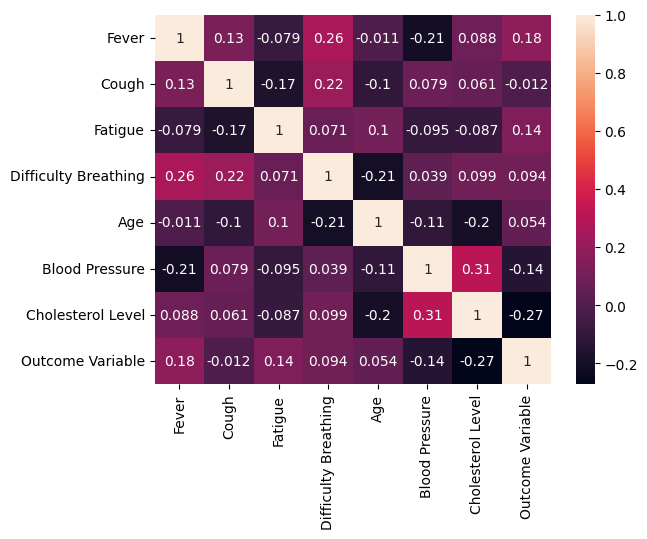

In [13]:
htm = sns.heatmap(corr, annot=True)
htm

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'Influenza'),
  Text(1, 0, 'Common Cold'),
  Text(2, 0, 'Eczema'),
  Text(3, 0, 'Asthma'),
  Text(4, 0, 'Hyperthyroidism'),
  Text(5, 0, 'Allergic Rhinitis'),
  Text(6, 0, 'Anxiety Disorders'),
  Text(7, 0, 'Diabetes'),
  Text(8, 0, 'Gastroenteritis'),
  Text(9, 0, 'Pancreatitis'),
  Text(10, 0, 'Rheumatoid Arthritis'),
  Text(11, 

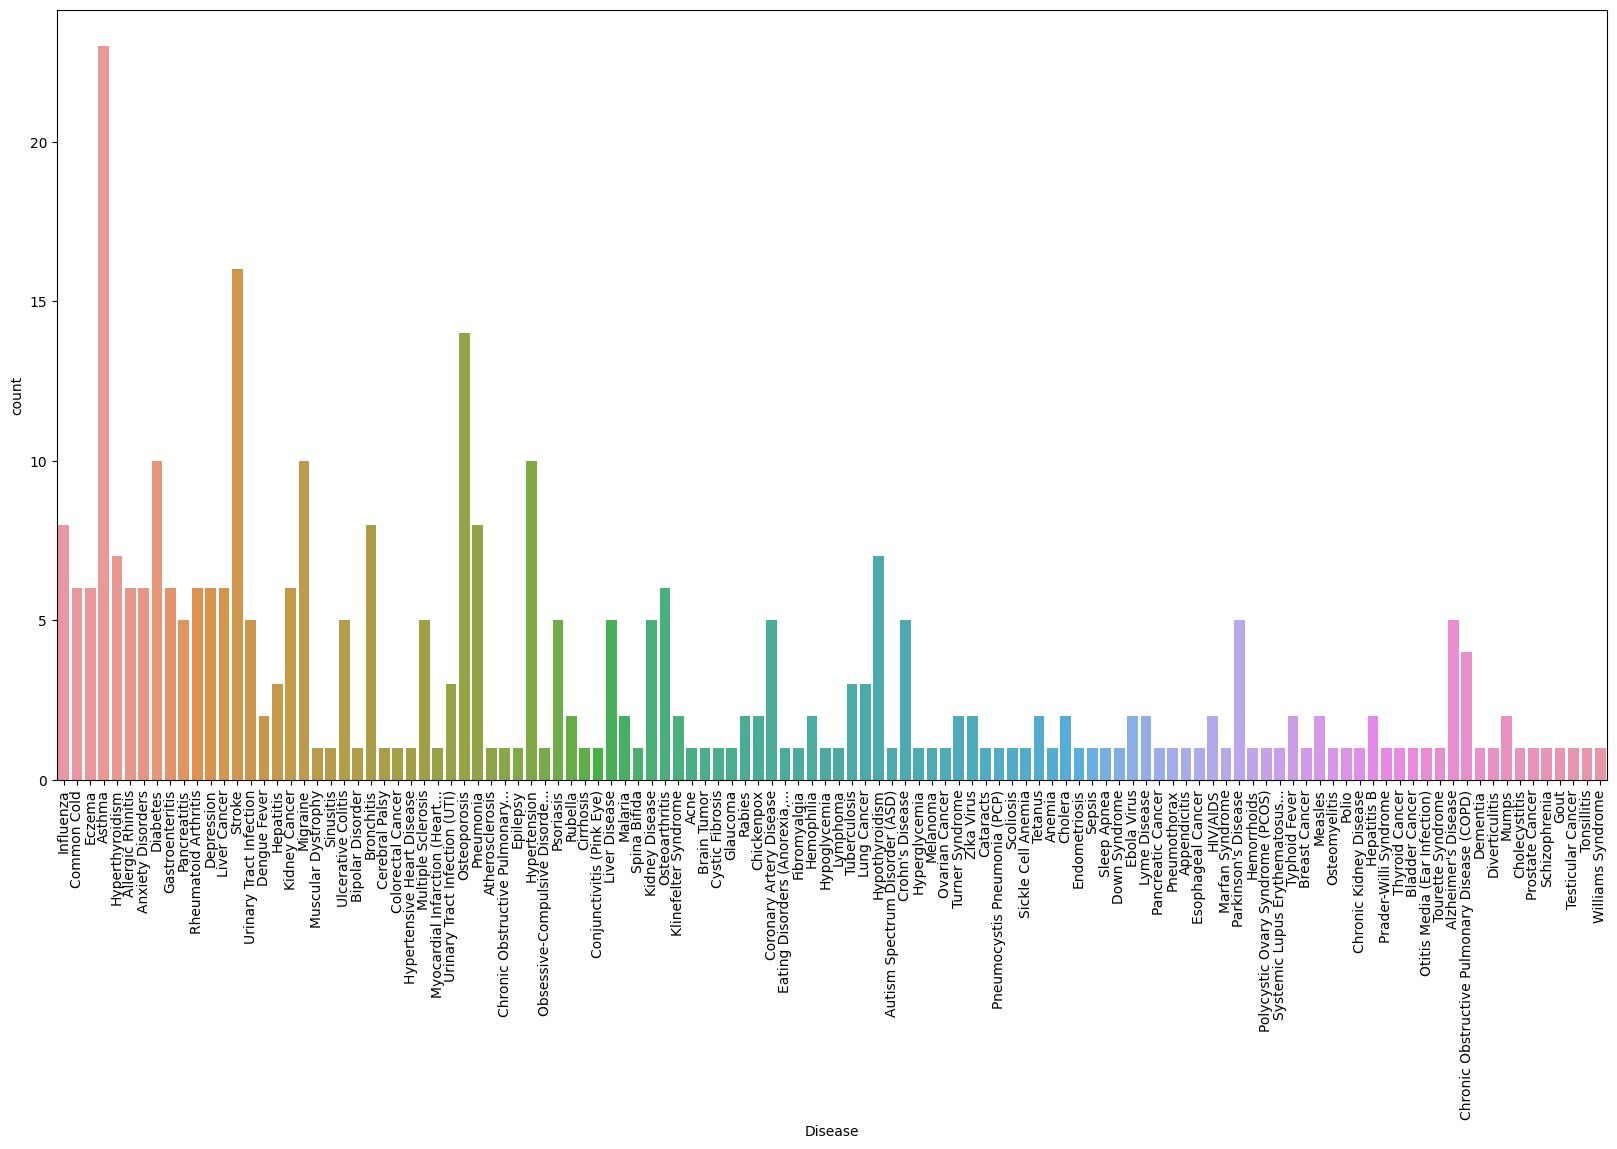

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='Disease', data=df)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, 'Influenza'),
  Text(1, 0, 'Common Cold'),
  Text(2, 0, 'Eczema'),
  Text(3, 0, 'Asthma'),
  Text(4, 0, 'Hyperthyroidism'),
  Text(5, 0, 'Allergic Rhinitis'),
  Text(6, 0, 'Anxiety Disorders'),
  Text(7, 0, 'Diabetes'),
  Text(8, 0, 'Gastroenteritis'),
  Text(9, 0, 'Pancreatitis'),
  Text(10, 0, 'Rheumatoid Arthritis'),
  Text(11, 

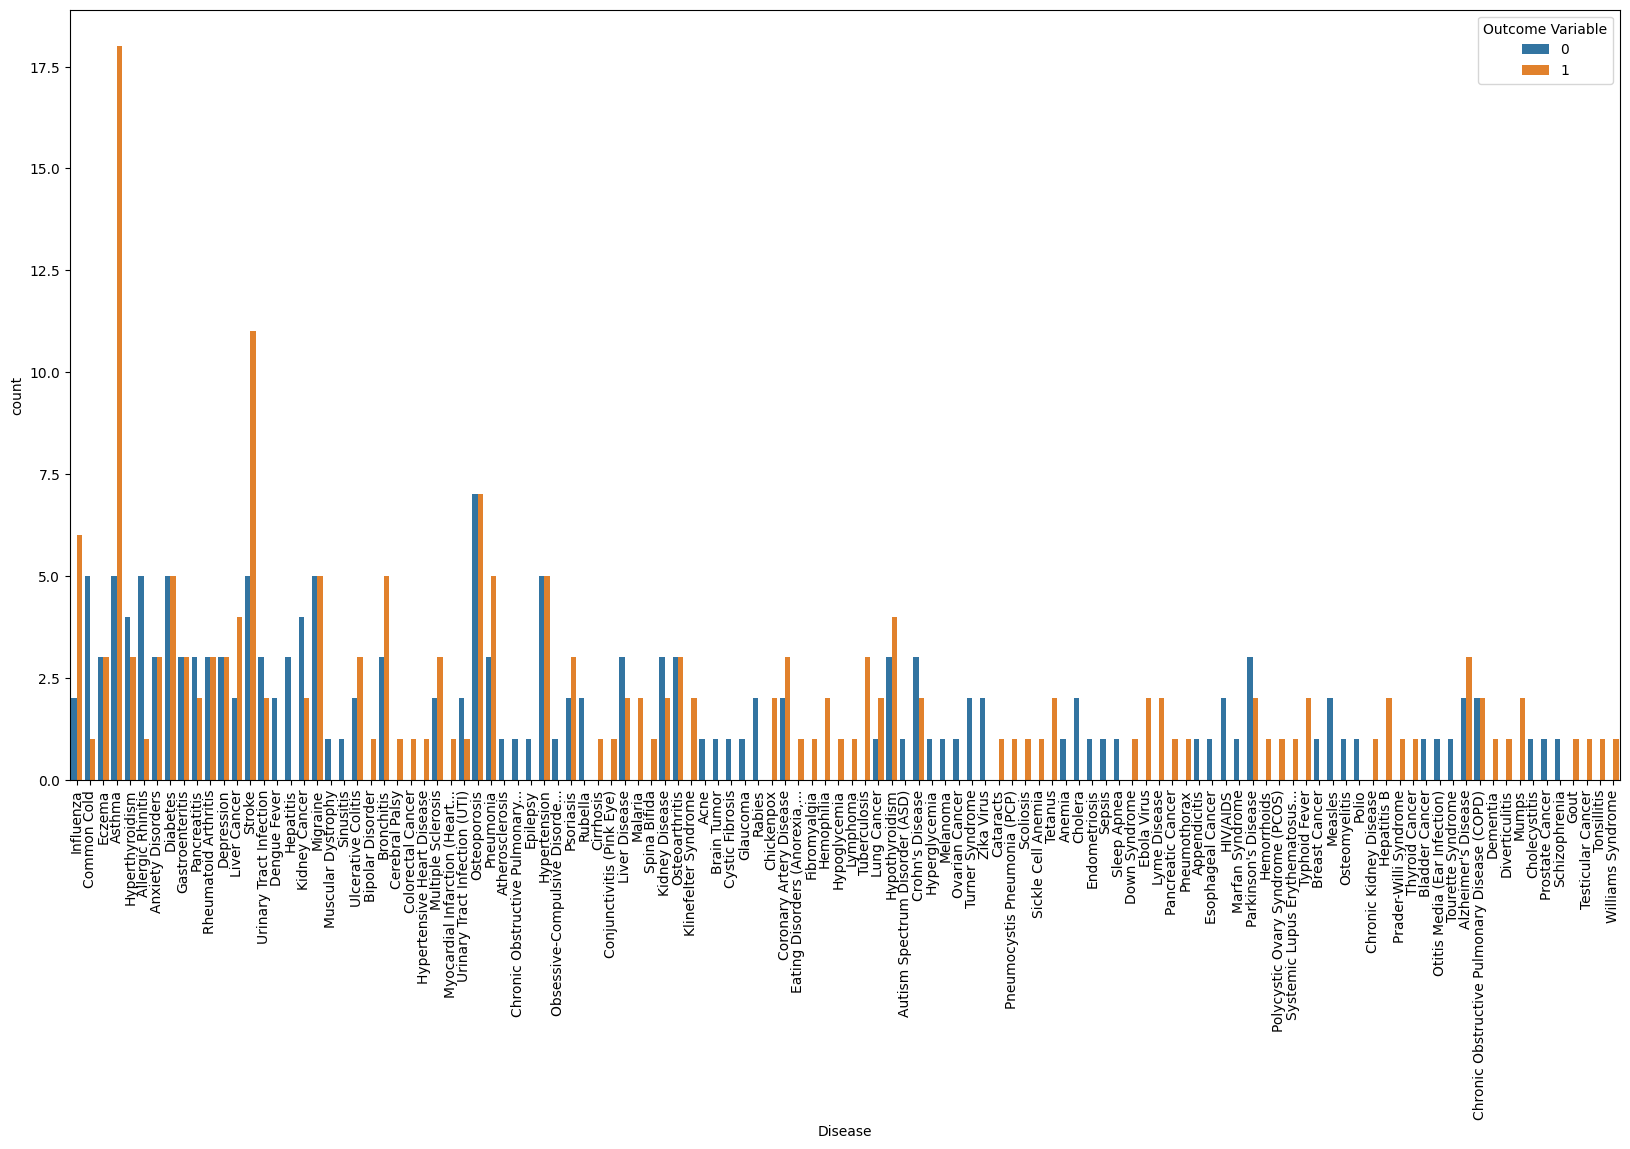

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x='Disease', data=df, hue='Outcome Variable')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115],
 [Text(0, 0, 'Influenza'),
  Text(1, 0, 'Common Cold'),
  Text(2, 0, 'Eczema'),
  Text(3, 0, 'Asthma'),
  Text(4, 0, 'Hyperthyroidism'),
  Text(5, 0, 'Allergic Rhinitis'),
  Text(6, 0, 'Anxiety Disorders'),
  Text(7, 0, 'Diabetes'),
  Text(8, 0, 'Gastroenteritis'),
  Text(9, 0, 'Pancreatitis'),
 

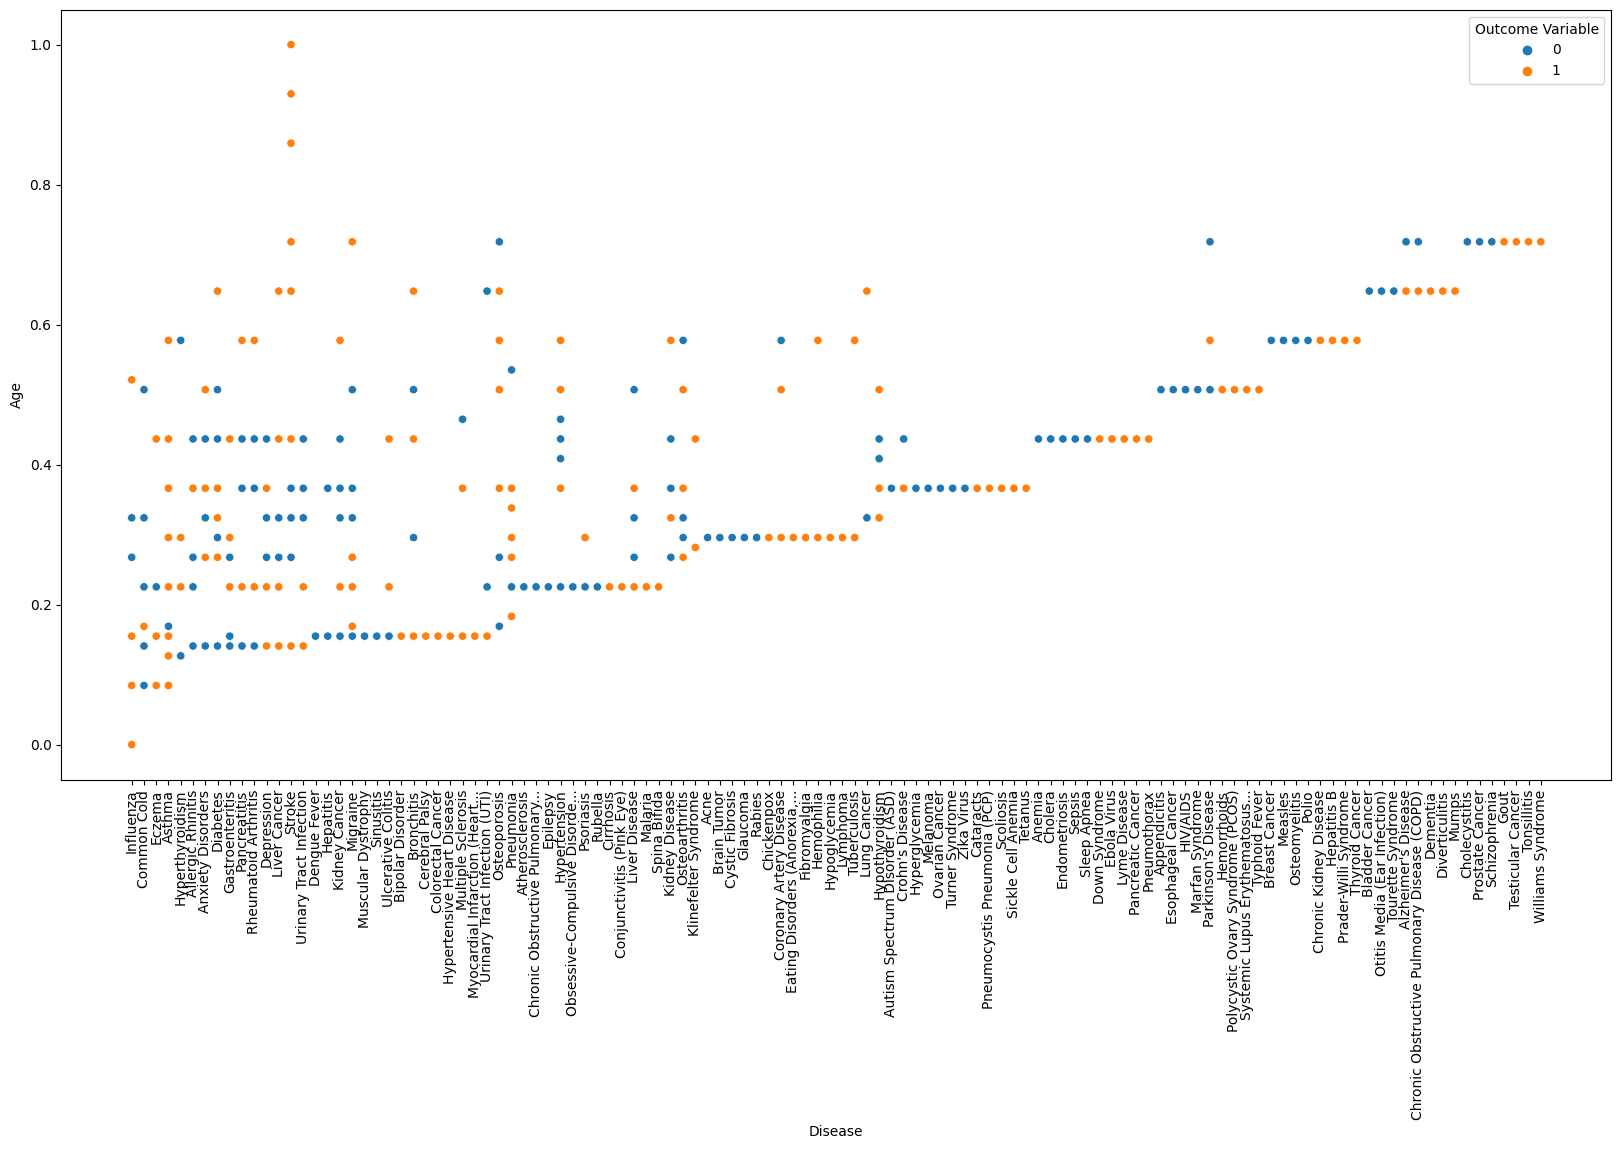

In [25]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Disease', y='Age', data=df, hue='Outcome Variable')
plt.xticks(rotation=90)

In [35]:
x = df.drop(['Disease', 'Outcome Variable', 'Gender'], axis=1)
y = df['Outcome Variable']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [37]:
x_train

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Blood Pressure,Cholesterol Level
115,0,0,1,1,0.295775,0,0
90,0,0,1,0,0.225352,2,0
29,0,1,1,0,0.154930,2,2
62,1,1,1,0,0.225352,0,2
254,0,0,1,0,0.507042,0,2
...,...,...,...,...,...,...,...
278,1,1,0,0,0.577465,0,2
331,0,1,1,1,0.718310,2,0
218,0,1,0,1,0.436620,2,2
223,1,1,0,1,0.436620,0,2


In [38]:
y_train

115    0
90     1
29     0
62     0
254    0
      ..
278    0
331    0
218    0
223    0
271    1
Name: Outcome Variable, Length: 279, dtype: int32

In [60]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

lg_score = lg_model.score(x_train, y_train)
print("Training Score:\n", lg_score)

lg_pred = lg_model.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, lg_pred))
print("\nClassification Report: \n", classification_report(y_test, lg_pred))

Training Score:
 0.6594982078853047

Confusion Matrix:
 [[16 15]
 [13 26]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.52      0.53        31
           1       0.63      0.67      0.65        39

    accuracy                           0.60        70
   macro avg       0.59      0.59      0.59        70
weighted avg       0.60      0.60      0.60        70



In [59]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

dt_score = dt_model.score(x_train, y_train)
print("Training Score:\n", dt_score)

dt_pred = dt_model.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))
print("\nClassification Report: \n", classification_report(y_test, dt_pred))

Training Score:
 0.9283154121863799

Confusion Matrix:
 [[22  9]
 [ 9 30]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        31
           1       0.77      0.77      0.77        39

    accuracy                           0.74        70
   macro avg       0.74      0.74      0.74        70
weighted avg       0.74      0.74      0.74        70



In [62]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

svm_score = svm_model.score(x_train, y_train)
print("Training Score:\n", svm_score)

svm_pred = svm_model.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("\nClassification Report: \n", classification_report(y_test, svm_pred))

Training Score:
 0.7275985663082437

Confusion Matrix:
 [[22  9]
 [14 25]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.71      0.66        31
           1       0.74      0.64      0.68        39

    accuracy                           0.67        70
   macro avg       0.67      0.68      0.67        70
weighted avg       0.68      0.67      0.67        70



In [63]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

rf_score = rf_model.score(x_train, y_train)
print("Training Score:\n", rf_score)

rf_pred = rf_model.predict(x_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report: \n", classification_report(y_test, rf_pred))

Training Score:
 0.9283154121863799

Confusion Matrix:
 [[22  9]
 [ 7 32]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.71      0.73        31
           1       0.78      0.82      0.80        39

    accuracy                           0.77        70
   macro avg       0.77      0.77      0.77        70
weighted avg       0.77      0.77      0.77        70



In [69]:
model_comparison = pd.DataFrame()

models = [lg_model, dt_model, svm_model, rf_model]

model_names = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest']

for model, name in zip(models, model_names):
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, model.predict(x_test))
    precision = precision_score(y_test, model.predict(x_test))
    recall = recall_score(y_test, model.predict(x_test))
    f1 = f1_score(y_test, model.predict(x_test))

    model_comparison = model_comparison.append(pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    }))

model_comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_34744\4064448754.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(pd.DataFrame({
C:\Users\Admin\AppData\Local\Temp\ipykernel_34744\4064448754.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(pd.DataFrame({
C:\Users\Admin\AppData\Local\Temp\ipykernel_34744\4064448754.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(pd.DataFrame({
C:\Users\Admin\AppData\Local\Temp\ipykernel_34744\4064448754.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparis

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.600000,0.634146,0.666667,0.650000
0,Decision Tree,0.742857,0.769231,0.769231,0.769231
0,Support Vector Machine,0.671429,0.735294,0.641026,0.684932
0,Random Forest,0.771429,0.780488,0.820513,0.800000
